In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")

In [3]:
training["train_test"] = 1
test["train_test"] = 0
test["Survived"] = np.NaN
all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [20]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test,cabin_multiple,numeric_ticket
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0,0.267116,0.741863
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0,0.547134,0.437855
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0,4.000000,1.000000


In [23]:
df_num = training[["Age", "SibSp", "Parch", "Fare"]]
df_cat = training[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

248

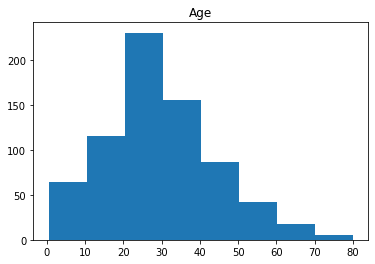

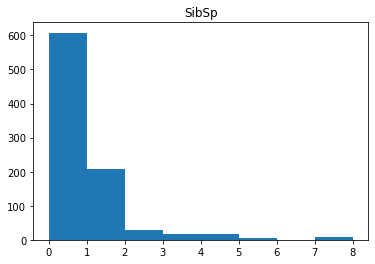

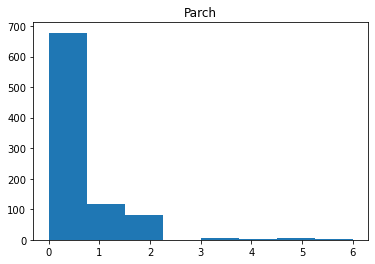

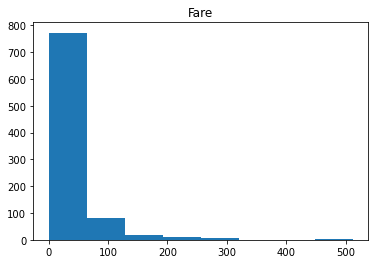

In [6]:
for col in df_num.columns:
    plt.hist(df_num[col], bins=8)
    plt.title(col)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

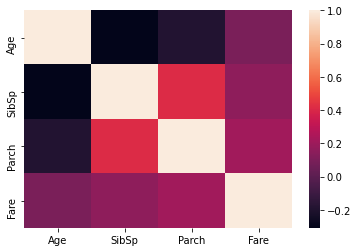

In [7]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [8]:
pd.pivot_table(training, index="Survived", values= ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\quocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


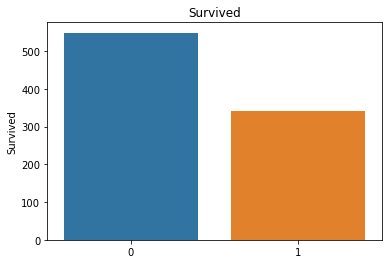

C:\Users\quocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


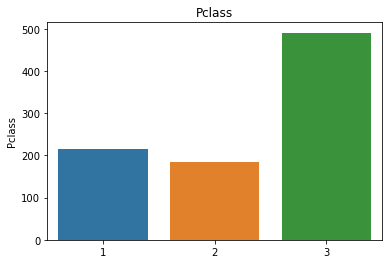

C:\Users\quocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


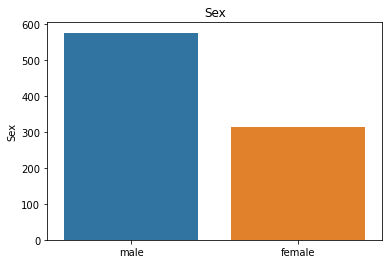

C:\Users\quocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


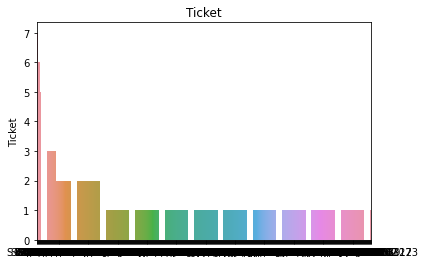

C:\Users\quocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


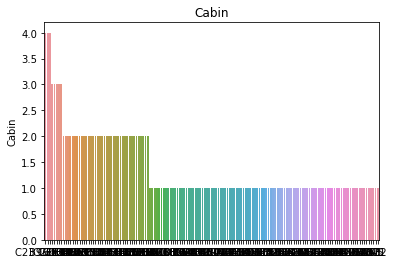

C:\Users\quocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


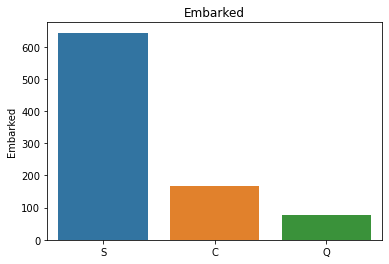

In [9]:
# for col in df_cat.columns:
#     plt.bar(df_cat[col].value_counts().index, df_cat[col].value_counts())
#     plt.title(col)
#     plt.show()
for col in df_cat.columns:
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts()).set_title(col)
    plt.show()

In [10]:
print(pd.pivot_table(training, index="Survived", columns="Pclass", values ="Ticket", aggfunc="count"))
print("\n")
print(pd.pivot_table(training, index="Survived", columns="Sex", values ="Ticket", aggfunc="count"))
print("\n")
print(pd.pivot_table(training, index="Survived", columns="Embarked", values="Ticket", aggfunc="count"))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [11]:
df_cat.Cabin
training["cabin_multiple"] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
training.cabin_multiple.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [12]:
print(pd.pivot_table(training, index="Survived", columns="cabin_multiple", values="Ticket", aggfunc="count"))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [13]:
training["cabin_adv"] = training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_adv.value_counts())
print("\n")
print(pd.pivot_table(training, index="Survived", columns="cabin_adv", values="Ticket", aggfunc="count"))

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


In [14]:
training["numeric_ticket"] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
print(training.numeric_ticket.value_counts())
print("\n")
print(pd.pivot_table(training, index="Survived", columns="numeric_ticket", values="Ticket", aggfunc="count"))

1    661
0    230
Name: numeric_ticket, dtype: int64


numeric_ticket    0    1
Survived                
0               142  407
1                88  254


In [15]:
training["ticket_letters"] = training.Ticket.apply(lambda x: "".join(x.split(" ")[:-1]).replace(".","").replace("/","").lower() if len(x.split(" ")[:-1]) > 0 else 0)
print(training.ticket_letters.value_counts())
print("\n")
print(pd.pivot_table(training, index="Survived", columns="ticket_letters", values="Ticket", aggfunc="count"))

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
wep            3
sopp           3
pp             3
ppp            2
sotono2        2
swpp           2
scah           2
sop            1
fa             1
fc             1
as             1
sc             1
sp             1
casoton        1
scow           1
scahbasle      1
sca4           1
Name: ticket_letters, dtype: int64


ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

ticket_letters  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                         

In [16]:
# training.Name.head(50)
training["name_title"] = training.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
training.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
the Countess      1
Don               1
Sir               1
Lady              1
Mme               1
Capt              1
Jonkheer          1
Name: name_title, dtype: int64

<AxesSubplot:>

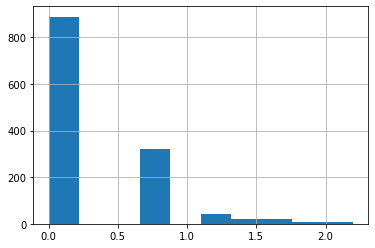

In [25]:
all_data["cabin_multiple"] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
all_data["cabin_adv"] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data["numeric_ticket"] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data["ticket_letters"] = all_data.Ticket.apply(lambda x: "".join(x.split(" ")[:-1]).replace(".", "").replace("/","").lower() if len(x.split(" ")[:-1]) >0 else 0)
all_data["name_title"] = all_data.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())
all_data.dropna(subset=["Embarked"], inplace=True)

all_data["norm_sibsp"] = np.log(all_data.SibSp+1)
all_data["norm_sibsp"].hist()